# Default Prediction & Analysis

<img src="image.jpg" width="800">


#### Dataset Info: 
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card customers, from April/05 to September/05.


#### Dataset Contents:
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

#### Objectives: 
* to check the strongest predictors of default; and
* to predict on which customers are likely to default.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
data = pd.read_csv("credit_card.csv")

In [3]:
# having a look at first five lines
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# having a look at columns name
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# EDA

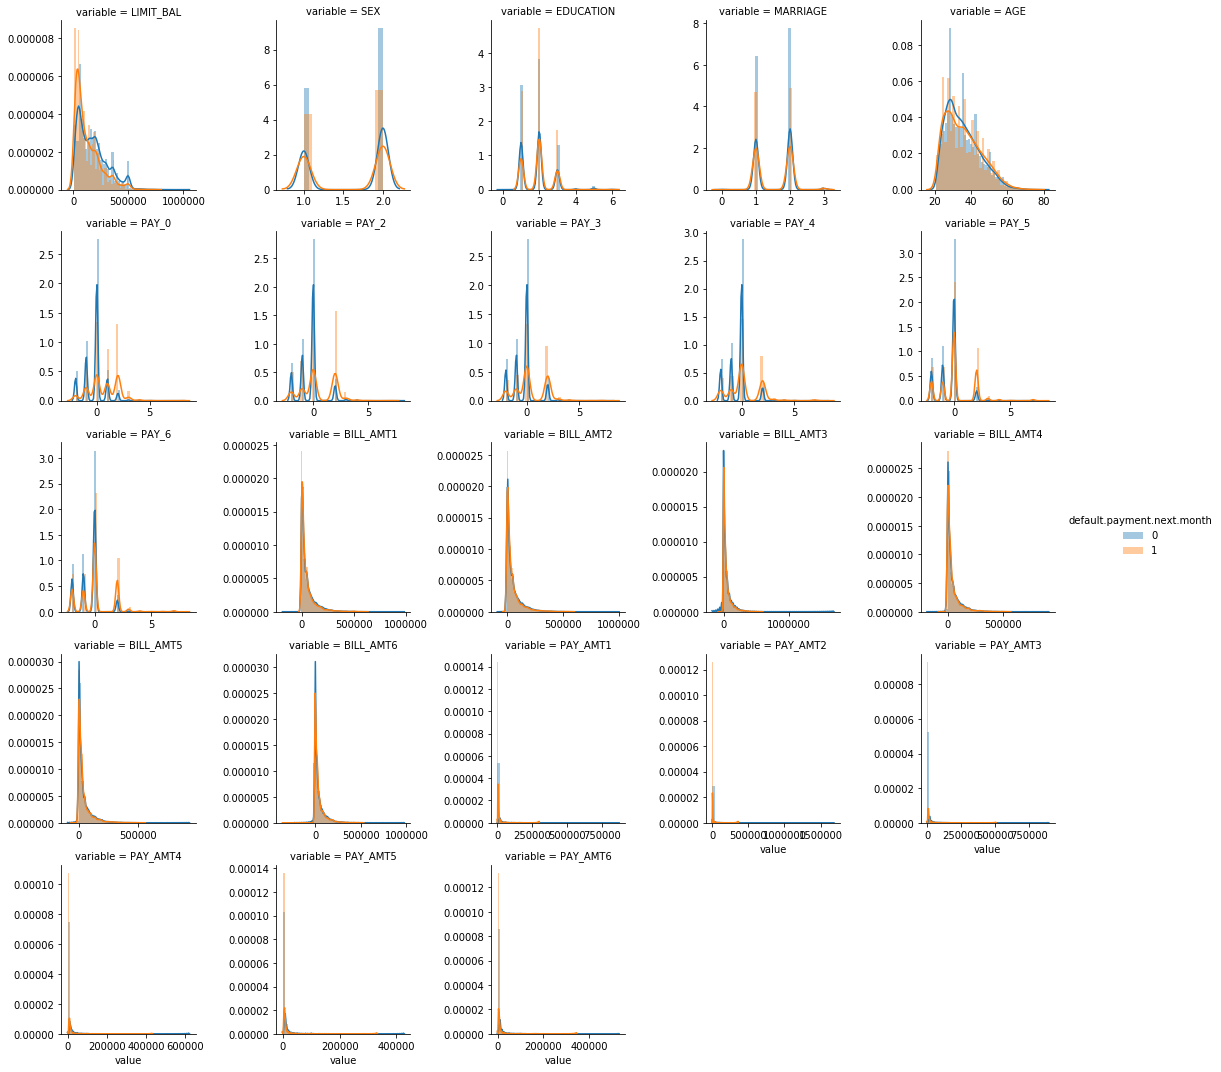

In [5]:
# as our label variable is categorical, we can divide the statistical distributions by 'default' (1) or 'non-default' (0)... 
# ...to better comprehend the chacacteristcs of the groups

last_column = 'default.payment.next.month'

cls = [plots for plots in data.columns
        if data.dtypes[plots] != "object"]


cls.remove("ID") #remove the column ID 
cls.remove(last_column) #remove the column  


plots = sns.FacetGrid(pd.melt( data, id_vars=last_column, value_vars=cls), hue=last_column, col="variable", 
                  col_wrap=5, sharex=False, sharey=False ).map( sns.distplot, "value", kde=True).add_legend()

### Comments:
*     Defaults have a higher proportion of lower credit limit values (LIMIT_BAL)
*     NonDefaults have a higher proportion of:
Females (Sex=2), MoreEducated (EDUCATION=1 or 2), Singles (MARRIAGE=2) and people between 30-40 years of age
*     NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables 

### CHI-SQUARE (TEST OF INDEPENDENCE)

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.  The data can be displayed in a contingency table where each row represents a category for one variable and each column represents a category for the other variable.  For example, say a researcher wants to examine the relationship between gender (male vs. female) and empathy (high vs. low).  The chi-square test of independence can be used to examine this relationship.  The null hypothesis for this test is that there is no relationship between gender and empathy.  The alternative hypothesis is that there is a relationship between gender and empathy (e.g. there are more high-empathy females than high-empathy males).


It has a null hypothesis: the **Outcome_Category** is independent of the **inputVar**. So, we create a test-statistic which is a measure of the difference between "expected" i.e. and "observed" i.e. The p-value returned is the probability of seeing this test-statistic if the null-hypothesis is true


In [6]:
# Code of Chi-Square Test of Independence
def ChiSquare(df, inputVar, Outcome_Category ):

    Outcome_Category_Table = df.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = df[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = df[ df[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Error! The class " + str( possible) +" of \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test needs at least 5 observations in each cell!")
            print( inputVar + "=" + str(possible) + " has insufficient data")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( df[df[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("The statistical test calculated is %.2f" % chi_squared_stat )
    print("If " + Outcome_Category + " is independent of " + inputVar + ", this has likely %.2e of occurring" % p_value )

In [7]:
# test for SEX
ChiSquare(data,"SEX",last_column)

The statistical test calculated is 47.91
If default.payment.next.month is independent of SEX, this has likely 4.47e-12 of occurring


In [8]:
# test of independence for EDUCATION
data["EDUCATION_Corr"] = data["EDUCATION"].apply(lambda x: x if ((x>0) and (x<4)) else 4)

cls.remove("EDUCATION")
cls.append("EDUCATION_Corr")

ChiSquare(data,"EDUCATION_Corr",last_column) 

The statistical test calculated is 160.41
If default.payment.next.month is independent of EDUCATION_Corr, this has likely 0.00e+00 of occurring


In [9]:
# test of independence for MARRIAGE
ChiSquare(data,"MARRIAGE",last_column)

The statistical test calculated is 35.66
If default.payment.next.month is independent of MARRIAGE, this has likely 8.83e-08 of occurring


### Comments:
* Therefore, default is dependent on the EDUCATION and MARRIAGE columns
* I find useful to separate the variables into "quantitative" vs "qualitative" and also to keep track of those that I've transformed (instead of overwriting them).

In [10]:
# The quantitative vars:
quant = ["LIMIT_BAL", "AGE"]

# The qualitative but "Encoded" variables (ie most of them)
qual_Enc = cls
qual_Enc.remove("LIMIT_BAL")
qual_Enc.remove("AGE")

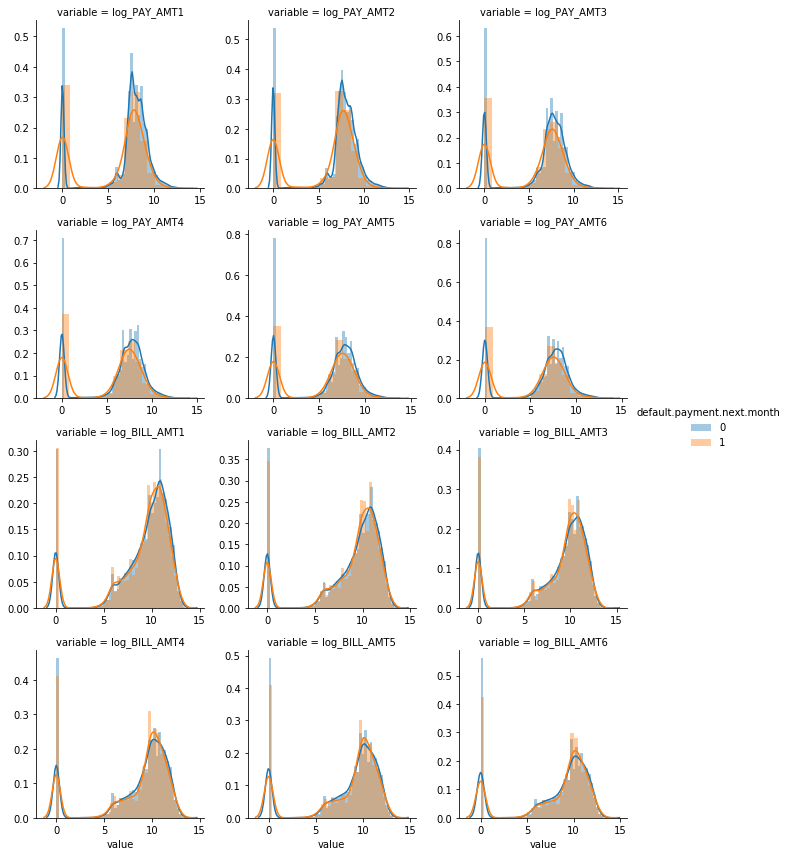

In [11]:
# transformation of BILL_AMT and PAY_AMT variables from NT Dollars to Log(NT Dollars)
logged = []
for ii in range(1,7):
    qual_Enc.remove("PAY_AMT" + str( ii ))
    data[ "log_PAY_AMT" + str( ii )]  = data["PAY_AMT"  + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_AMT" + str( ii ) )

for ii in range(1,7):
    qual_Enc.remove("BILL_AMT" + str( ii ))
    data[ "log_BILL_AMT" + str( ii )] = data["BILL_AMT" + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_BILL_AMT" + str( ii ) )

g = sns.FacetGrid(pd.melt( data,id_vars=last_column, value_vars=logged),
                  hue=last_column, col="variable", col_wrap=3, 
                  sharex=False, sharey=False ).map(sns.distplot,"value", kde=True).add_legend()

### Comments:
* It seems that higher Log PAY_AMT is related to slightly less default
* So, now we have quant variables, qual_Enc variables and logged variables

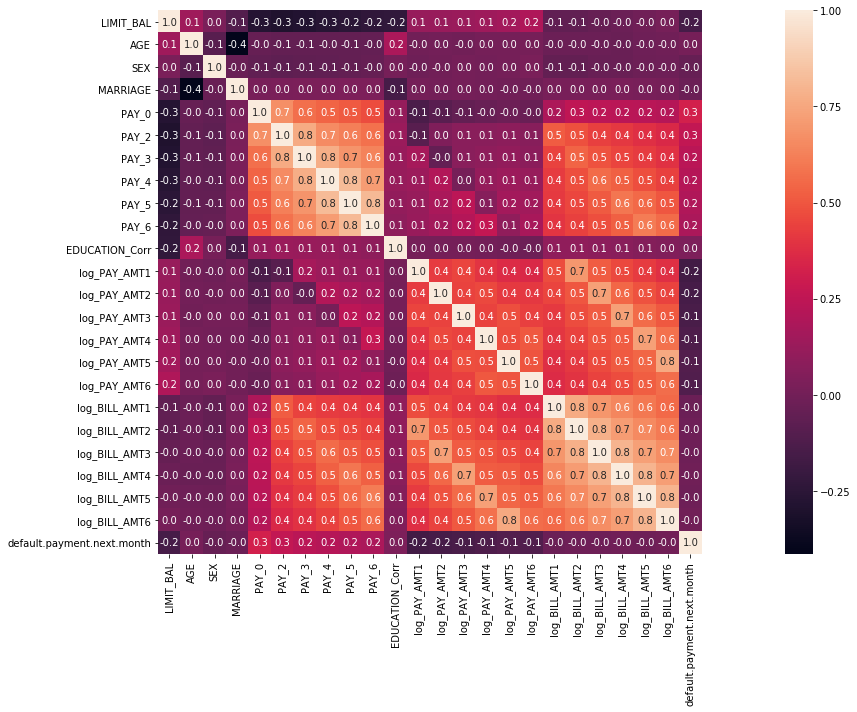

In [13]:
# correlations among variables
features = quant + qual_Enc + logged + [last_column]
corr = data[features].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )  

### Comments:
* According to the heatmap, the strongest predictors of default are PAY_X's, LIMIT_BAL and Log_PAY_AMT variables.

# Machine Learning Models (Tests)

In [21]:
features = quant + qual_Enc + logged   
X = data[features].values    
y = data[last_column].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )

# We'll need some metrics to evaluate our models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### 1) Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.4f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for RandomForest = 0.8057
Mean RandomForest CrossVal Accuracy on Train Set 0.8092, with std=0.01


### 2) SVM (Support Vector Machine)

In [23]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for SVM Model = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean SVM CrossVal Accuracy on Train Set %.4f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for SVM Model = 0.8187
Mean SVM CrossVal Accuracy on Train Set 0.8211, with std=0.01


### 3) Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for Logistic Regression = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean Logistic Regression CrossVal Accuracy on Train Set %.4f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

Accuracy on Test Set for Logistic Regression = 0.8077
Mean Logistic Regression CrossVal Accuracy on Train Set 0.8066, with std=0.01


### 4) NB (Naive Bayes)

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.4f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

Accuracy on Test Set for NBClassifier = 0.7538
Mean NaiveBayes CrossVal Accuracy on Train Set 0.7571, with std=0.01


### 5) KNN (K-Neighbors)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.4f, with std=%.4f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.7908
Mean KN CrossVal Accuracy on Train Set Set 0.7571, with std=0.0127


# Conclusion:

* According to the tests carried out with the different Machine Learning models, we observed that the model with the highest percentage of accuracy is the SVM class (accuracy ~ 82%). Therefore, the SVM model has ~ 82% accuracy in predicting whether a customer is likely to default in the next month

* The variables that most contribute to predict default are: PAY_X (repayment status in previous months), LIMIT_BAL(amount of given credit in NT dollars) and PAY_AMTX (amount paid in previous months). 

* A good credit score profile: according to the dataset, an individual female, more educated, single and between 30-40 years of age means a customer is more likely to make payments on time.
